# **Main Objective of the Analysis**

The primary objective of this analysis is to identify the key factors that contribute to customer churn in a telecommunication company and to build a predictive model that can classify whether a customer is likely to churn or not.

#### **Key Goals:**
1. **Understand Customer Behavior**: Analyze patterns in customer demographics, account information, and usage behavior that influence churn.
2. **Improve Customer Retention**: Provide actionable insights to reduce churn rates by identifying high-risk customers.
3. **Develop a Predictive Model**: Build and evaluate multiple classification models to predict customer churn with high accuracy and explainability.

By achieving these goals, the analysis aims to assist stakeholders in implementing targeted retention strategies, improving customer satisfaction, and increasing overall business profitability.

In [ ]:
#Requirement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# **Data Description**
##**1. Data Origin**
      
  The dataset used in this analysis is the 'Customer Churn Dataset', sourced from 'https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset'.

##**2. Overview of the Dataset**


This dataset consists of **505206 rows** and **12 columns**, containing both numerical and categorical variables. The key features include:

- **CustomerID**: A unique identifier for each customer in the dataset.
- **Age**: The age of the customer, represented as a numerical value.
- **Gender**: The gender of the customer, represented as a categorical variable (e.g., Male, Female).
- **Tenure**: The number of months the customer has been subscribed to the service.
- **Usage Frequency**: The frequency of service usage by the customer, recorded as a numerical value.
- **Support Calls**: The number of support calls made by the customer.
- **Payment Delay**: A numerical variable indicating the number of days of payment delay, if any.
- **Subscription Type**: The type of subscription the customer has, represented as a categorical variable (e.g., Basic, Standard, Premium).
- **Contract Length**: The length of the customer’s contract, represented in months.
- **Total Spend**: The total amount spent by the customer over their subscription period.
- **Last Interaction**: The date of the last interaction between the customer and the company.
- **Churn**: The target variable, represented as a binary value (0 = No churn, 1 = Churn). This indicates whether the customer has discontinued their subscription.

  *The target variable for this analysis is **Churn**, which represents whether the customer has churned (1) or not (0). The main goal of the analysis is to understand the factors contributing to churn and build a predictive model to identify high-risk customers.*


In [ ]:
data = pd.read_csv('customer_churn_dataset.csv')

In [ ]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


In [ ]:
print(data.head())
print(data.info())
print(data.describe())

   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         1.0  22.0  Female    25.0             14.0            4.0   
1         2.0  41.0  Female    28.0             28.0            7.0   
2         3.0  47.0    Male    27.0             10.0            2.0   
3         4.0  35.0    Male     9.0             12.0            5.0   
4         5.0  53.0  Female    58.0             24.0            9.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           27.0             Basic         Monthly        598.0   
1           13.0          Standard         Monthly        584.0   
2           29.0           Premium          Annual        757.0   
3           17.0           Premium       Quarterly        232.0   
4            2.0          Standard          Annual        533.0   

   Last Interaction  Churn  
0               9.0    1.0  
1              20.0    0.0  
2              21.0    0.0  
3              18.0    0.0  
4              18.0    0.

In [ ]:
print(data.isnull().sum())

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


# **Data Cleaning**

In [ ]:
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.00,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.00,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.00,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.00,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.00,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
505202,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
505203,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
505204,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
505205,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [ ]:
numerical_cols = data.select_dtypes(include=np.number).drop(columns =['CustomerID','Churn']).columns.tolist()
categorical_cols = data.select_dtypes(exclude=np.number).columns.tolist()
categorical_cols.append('Churn')
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
Categorical Columns: ['Gender', 'Subscription Type', 'Contract Length', 'Churn']


In [ ]:
for col in categorical_cols:
    print(data[col].unique())

['Female' 'Male' nan]
['Basic' 'Standard' 'Premium' nan]
['Monthly' 'Annual' 'Quarterly' nan]
[ 1.  0. nan]


In [ ]:
#Drop null values and ID
data = data.dropna().drop('CustomerID', axis=1)
#Label Encoder for categorical columns
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
data['Subscription Type'] = data['Subscription Type'].map({'Basic': 0, 'Standard': 1, 'Premium': 2})
data['Contract Length'] = data['Contract Length'].map({'Quarterly': 0, 'Annual': 1, 'Monthly': 2})

In [ ]:
data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22.0,0,25.0,14.0,4.0,27.0,0,0,598.0,9.0,1.0
1,41.0,0,28.0,28.0,7.0,13.0,1,0,584.0,20.0,0.0
2,47.0,1,27.0,10.0,2.0,29.0,2,1,757.0,21.0,0.0
3,35.0,1,9.0,12.0,5.0,17.0,2,2,232.0,18.0,0.0
4,53.0,0,58.0,24.0,9.0,2.0,1,1,533.0,18.0,0.0


# **Exploratory Data Analysis (EDA)**
  

## **1. Detect Outlier**

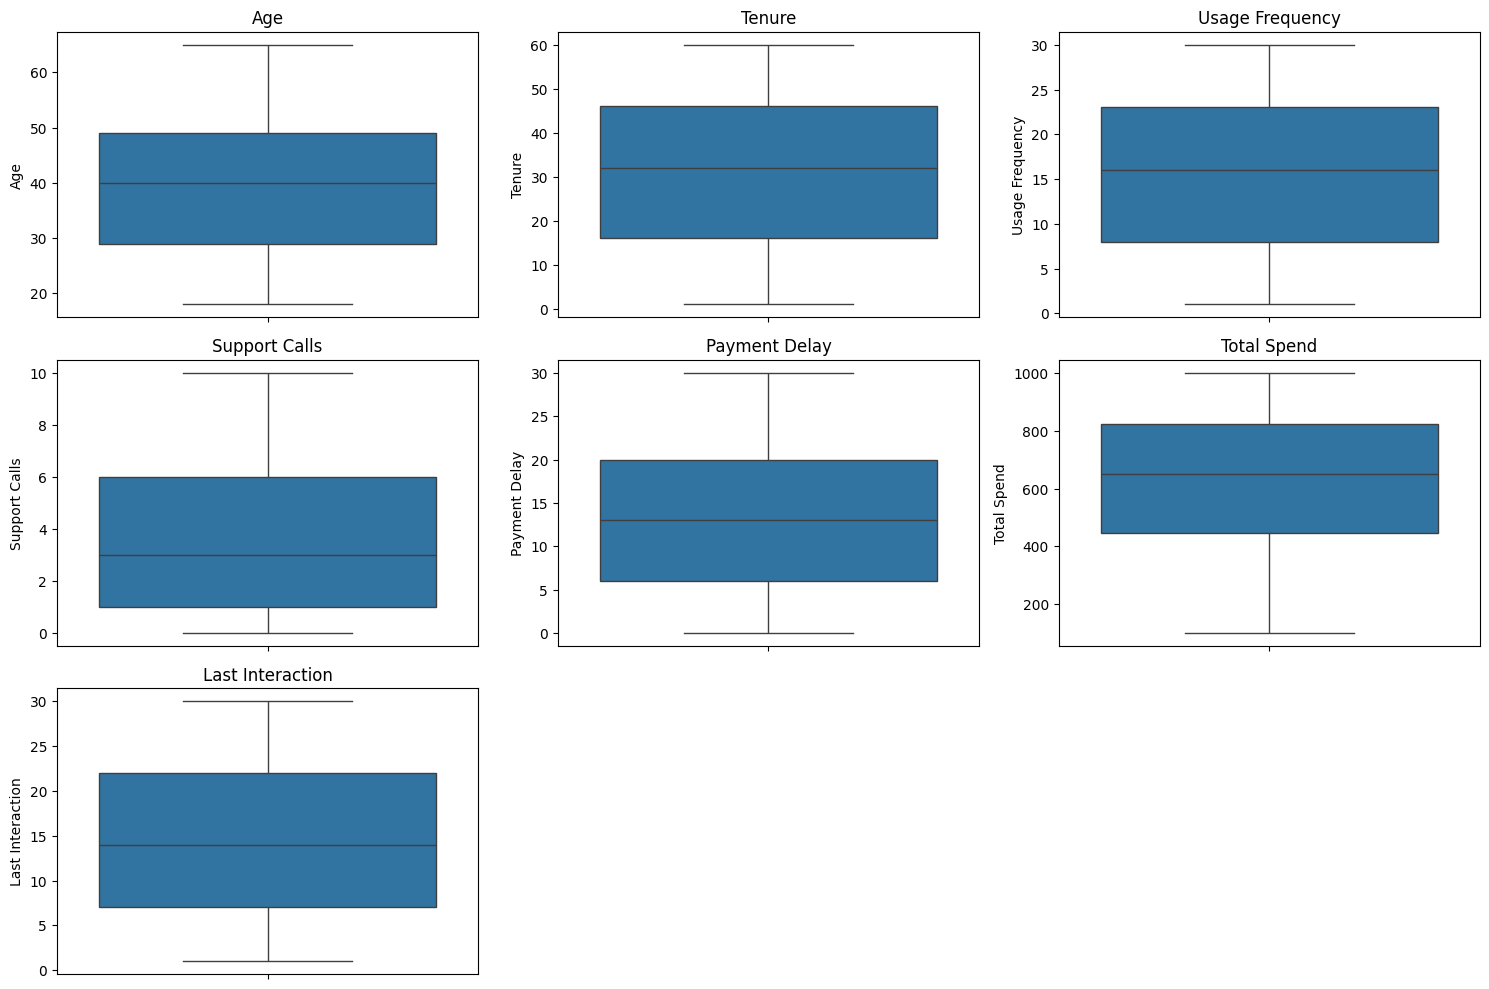

In [ ]:
# Create a boxplot for each numerical feature to visualize outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

##**2.Analysis Distribution**

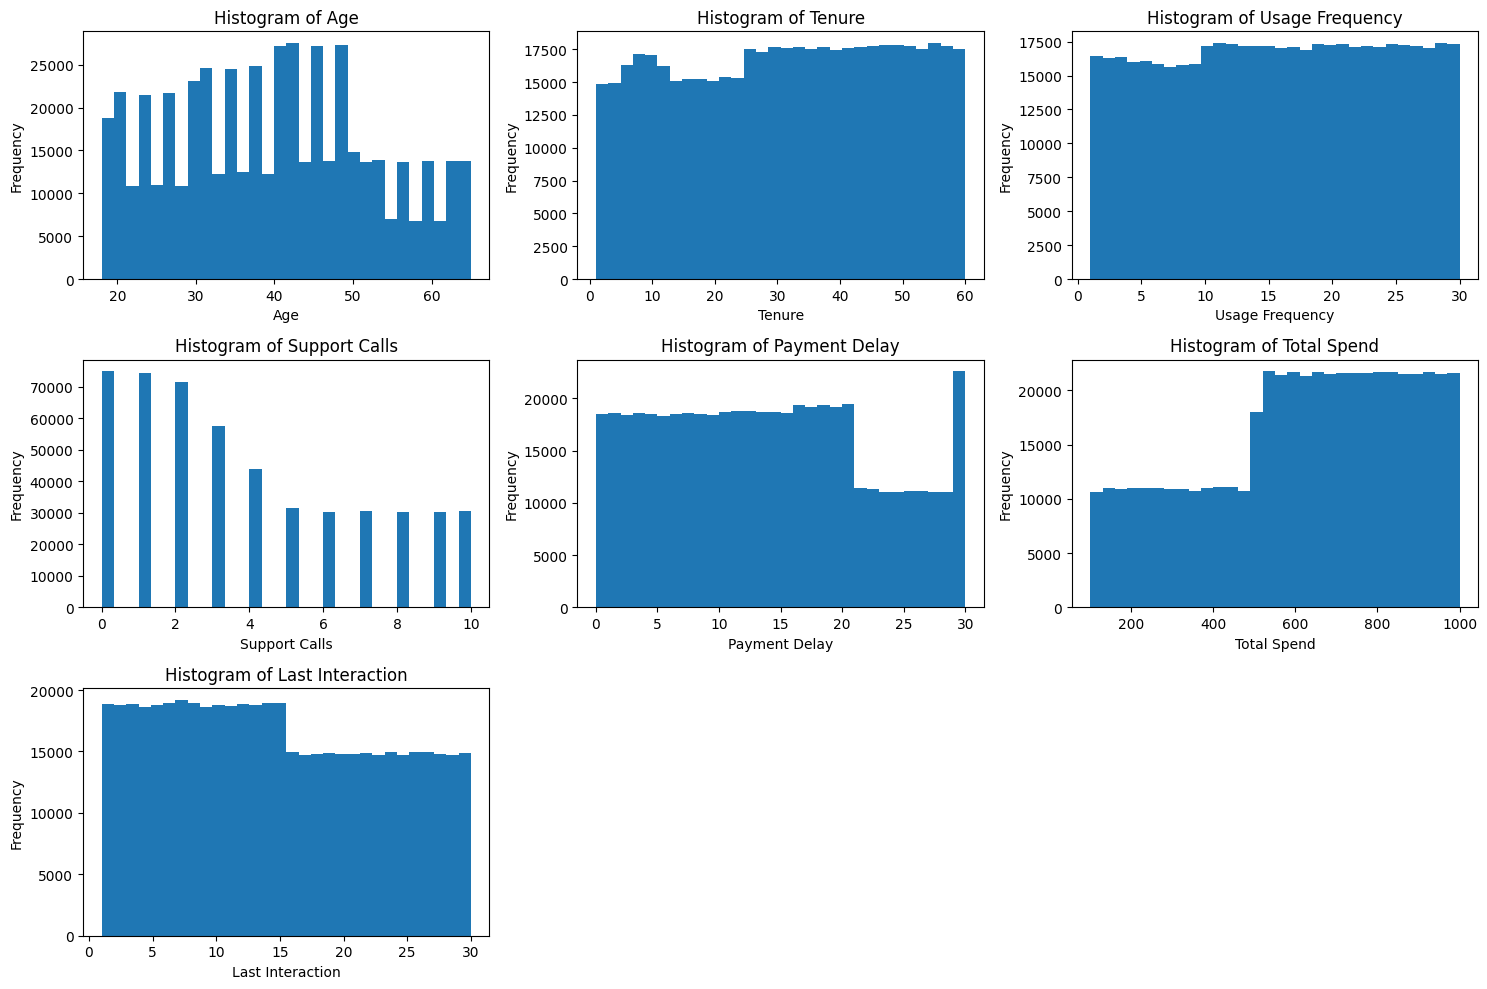

In [ ]:
#Histogram for numerical_cols
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    plt.hist(data[col], bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

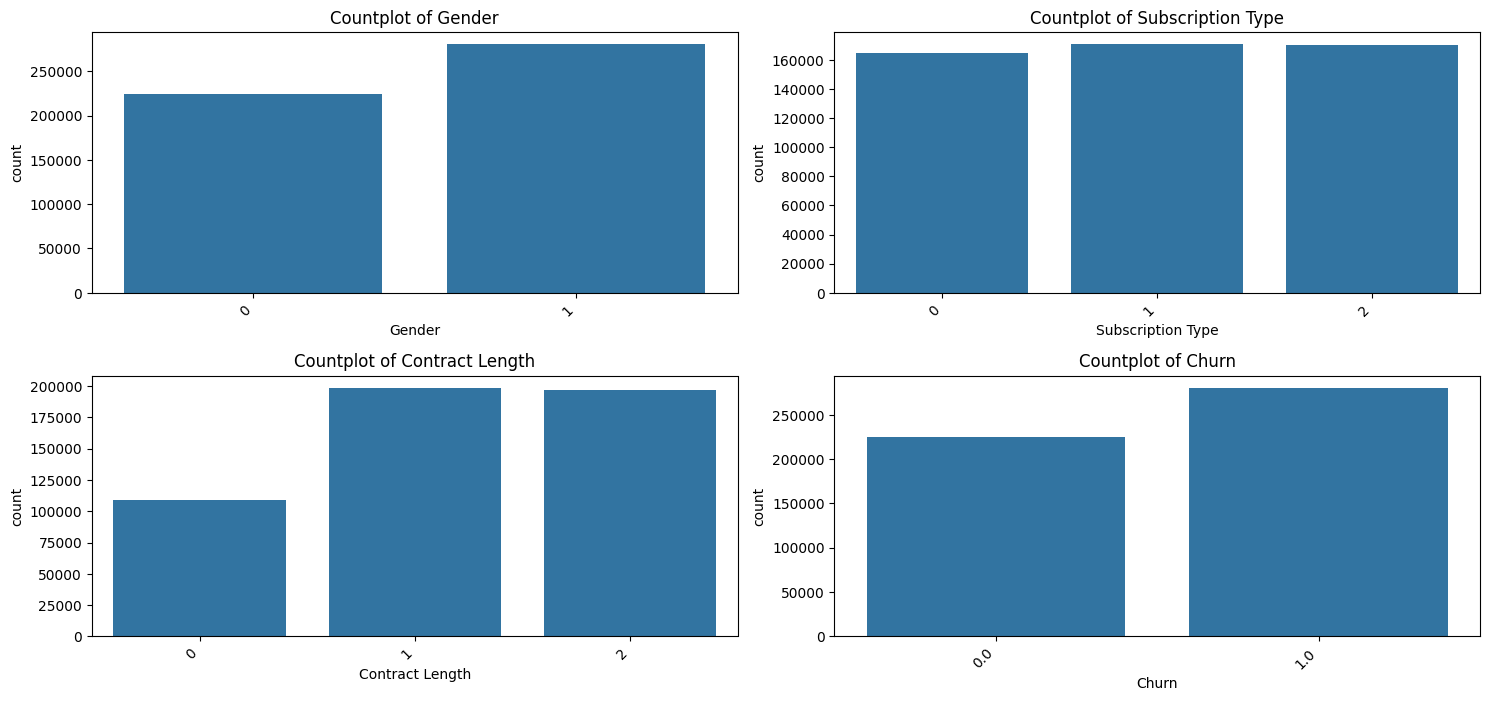

In [ ]:
#Countplot for Caterorical_cols
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=col, data=data)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

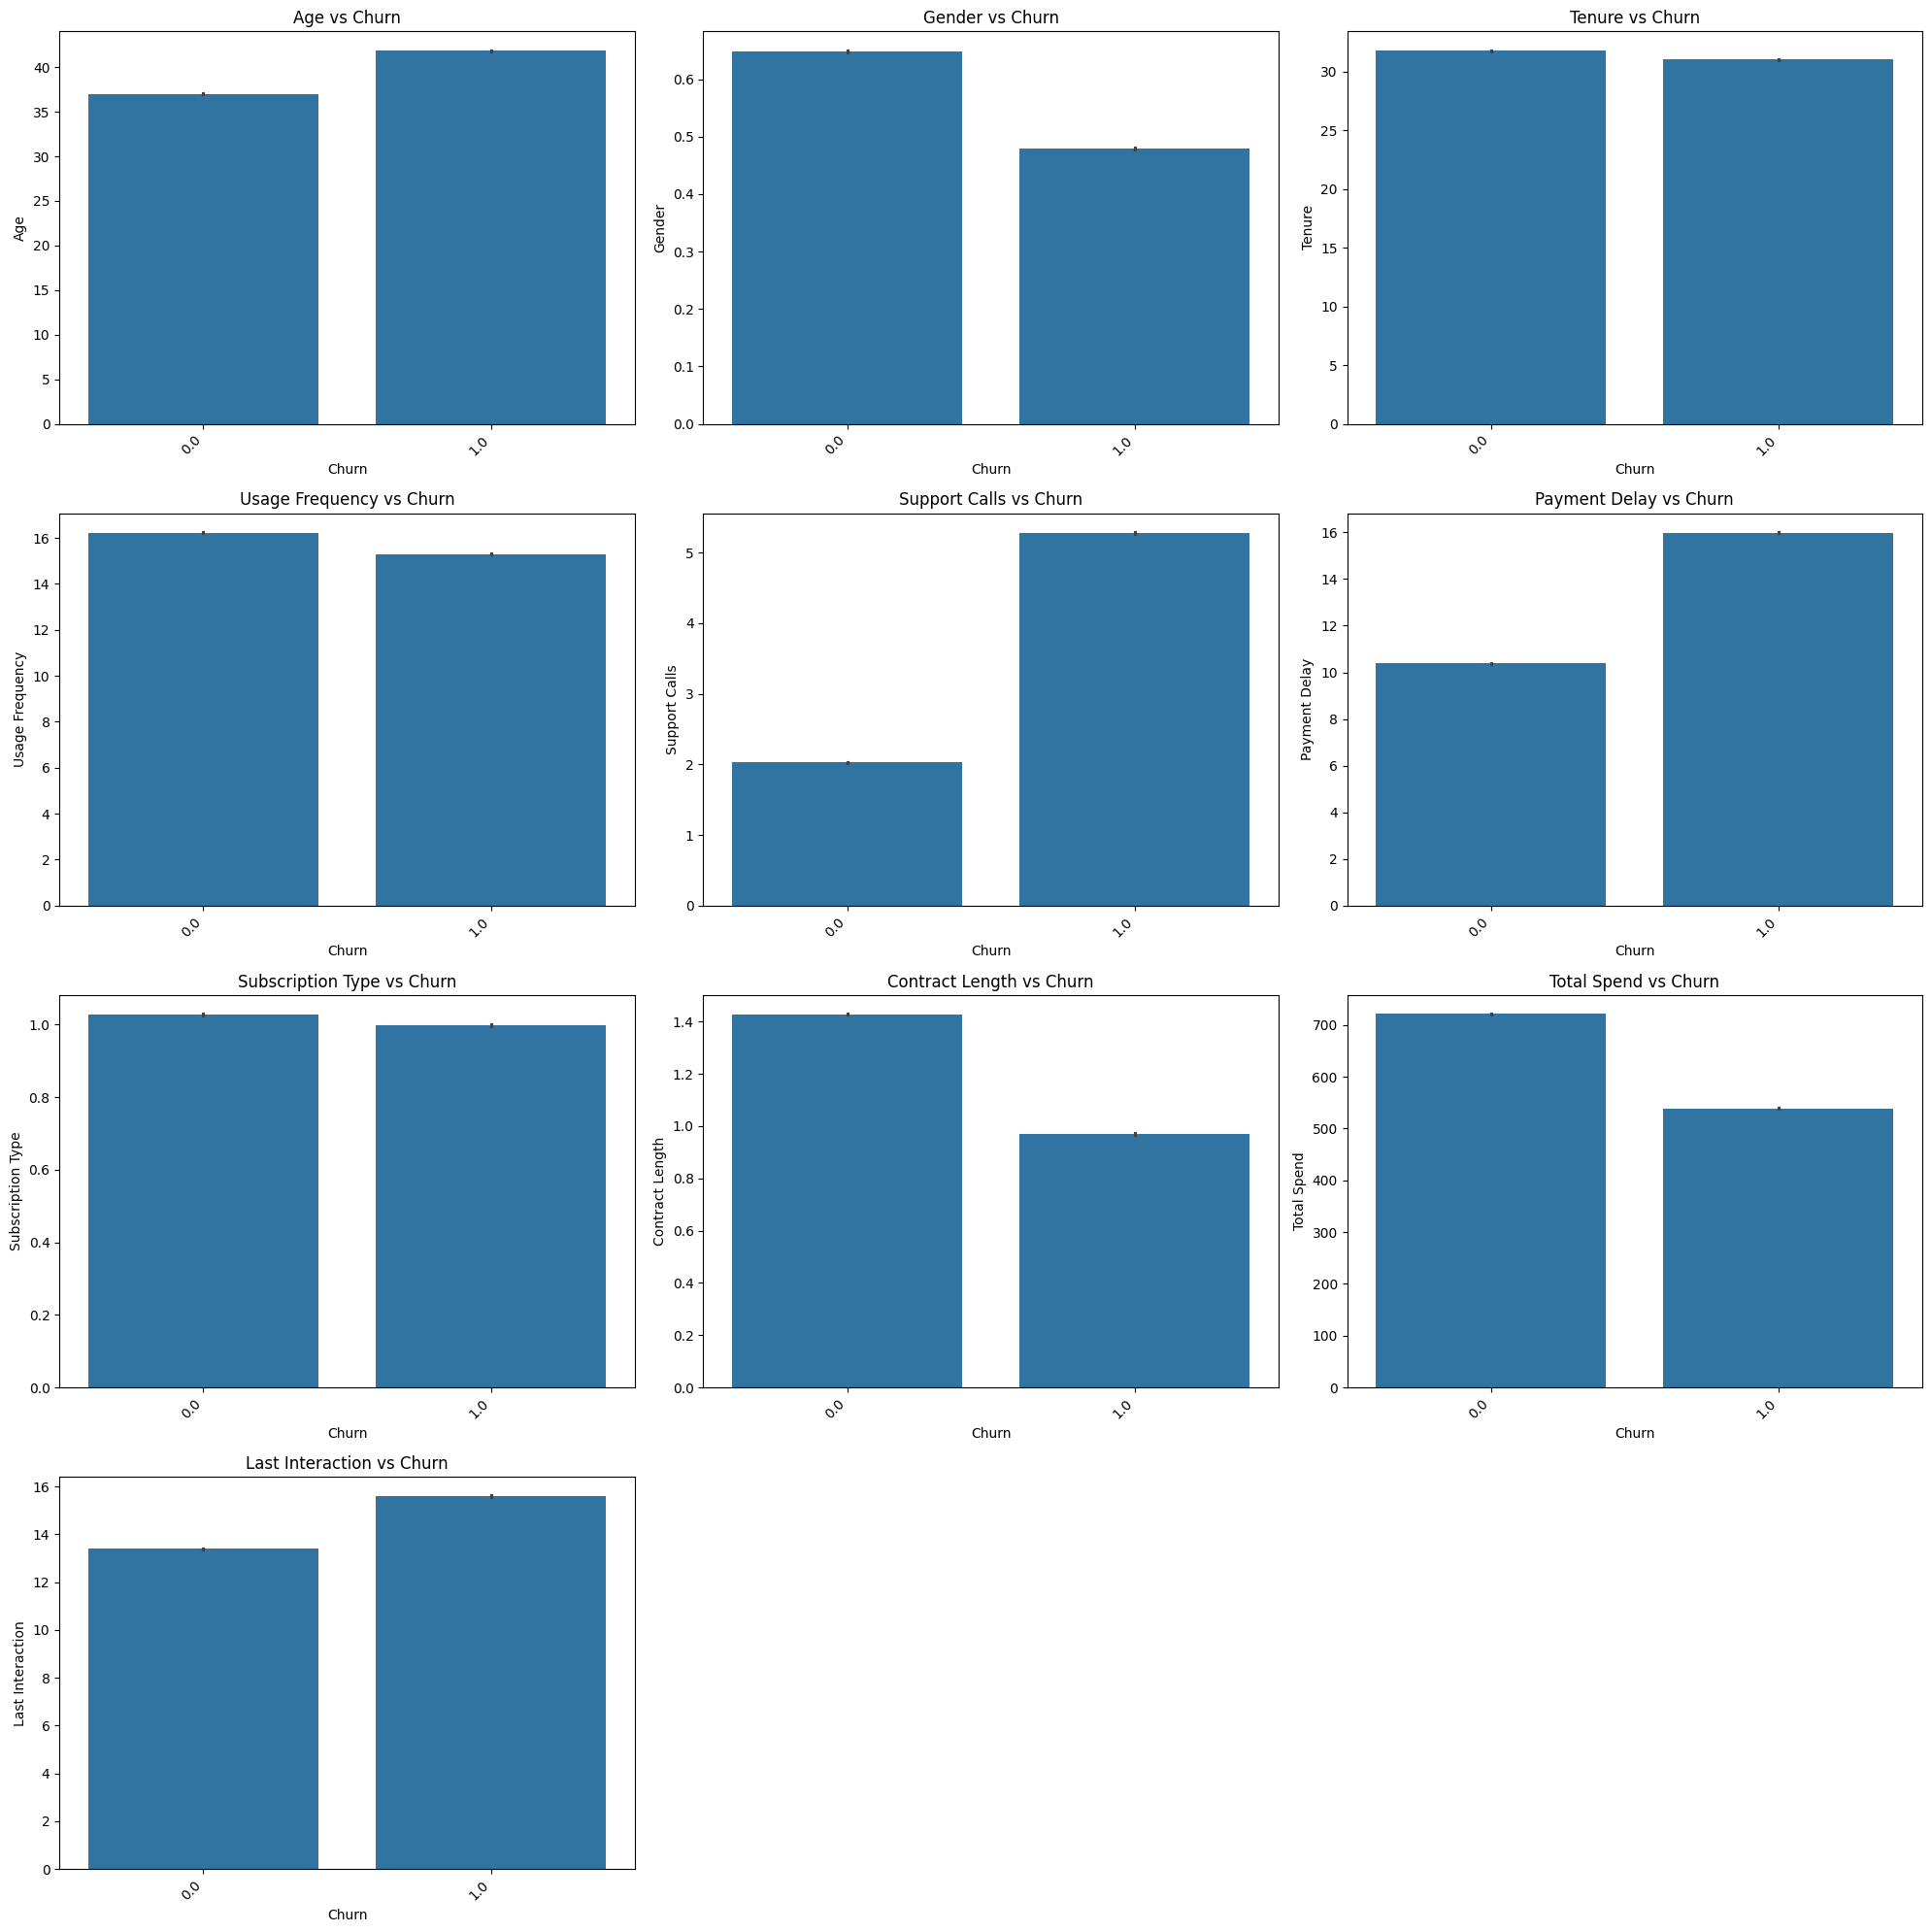

In [ ]:
# Create barplots for all features against 'Churn'
plt.figure(figsize=(20, 20))

for i, col in enumerate(data.columns):
    if col != 'Churn':
        plt.subplot(4, 3, i + 1)
        if data[col].dtype == 'object':
            sns.countplot(x=col, hue='Churn', data=data)
        else:
            sns.barplot(x='Churn', y=col, data=data) #numerical features

        plt.title(f'{col} vs Churn')
        plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

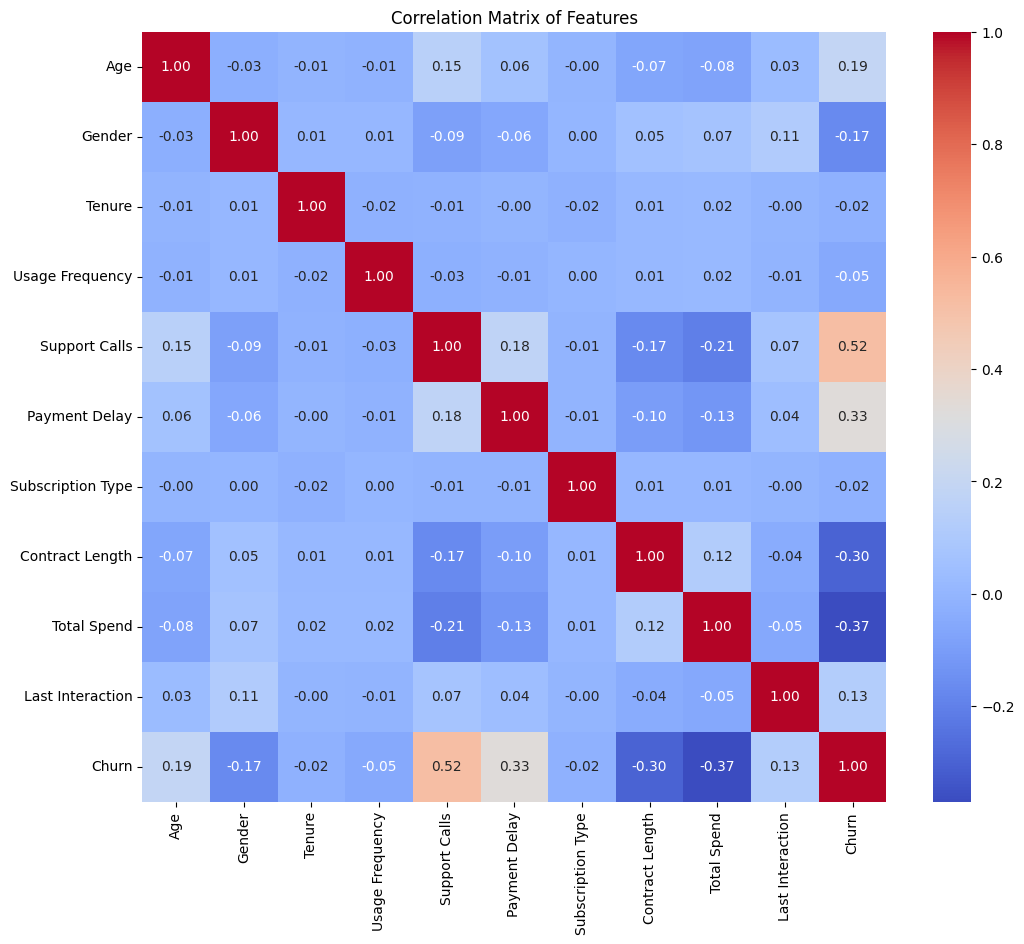

In [ ]:
correlation_matrix = data.corr()
# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

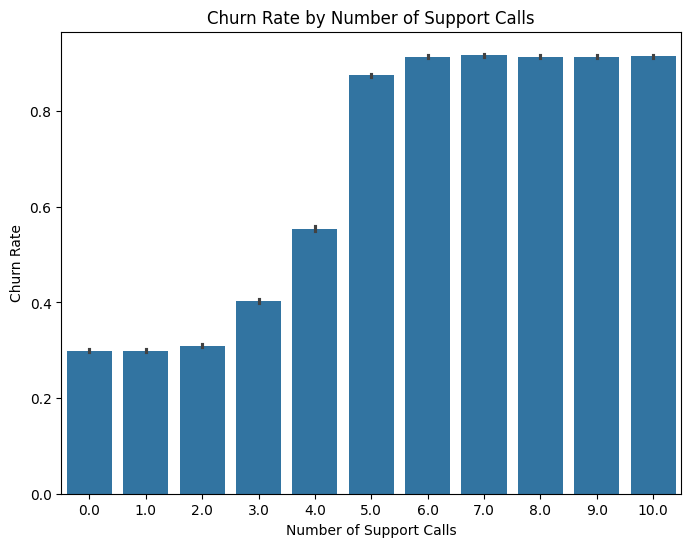

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Support Calls', y='Churn', data=data)
plt.title('Churn Rate by Number of Support Calls')
plt.xlabel('Number of Support Calls')
plt.ylabel('Churn Rate')
plt.show()

# **Feature Engineering**
## Feature Engineering: Scaling the Data

To prepare the data for model training, we applied feature scaling as part of the feature engineering process. After analyzing the distribution of the features, we observed that most of the data is uniformly distributed, without extreme outliers or skewness.

Given these observations, we selected **MinMaxScaler** for scaling the features. This scaler transforms the data by normalizing each feature to a fixed range, typically [0, 1], while preserving the relationships between the original values. The key advantages of using MinMaxScaler include:

1. **Preservation of Feature Distribution**: Since the data is evenly distributed, MinMaxScaler maintains the relative spacing between feature values.
2. **Improved Model Performance**: Many machine learning algorithms, such as tree-based models and distance-based models, benefit from scaled features to ensure balanced importance across dimensions.
3. **Suitability for Uniform Data**: MinMaxScaler is ideal when the data does not contain significant outliers, ensuring a proper scaling effect.

The scaled features will be used as inputs for the classification models in the next steps.

In [ ]:
X = data[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction','Gender', 'Subscription Type', 'Contract Length']]
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features in the training set
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the numerical features in the test set using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

#Model Selection Rationale and Evaluate Models

Upon analyzing the data, we observed the following:

1. The correlation coefficients between features and the target variable are close to 0, indicating weak linear relationships.
2. Visual inspections of scatter plots and pair plots revealed clear non-linear patterns in the data.

Given these observations, we decided to focus on tree-based models, which are well-suited for capturing non-linear relationships and interactions between features. The models selected for this analysis include:

- **Decision Tree Classifier (DTC)**: A simple and interpretable tree-based model that splits data into regions to maximize class separation.
- **Random Forest Classifier (RFC)**: An ensemble method that combines multiple decision trees to improve robustness and reduce overfitting.
- **Gradient Boosting Classifier (GBC)**: A powerful ensemble technique that iteratively improves the model by minimizing errors.

These models are expected to perform well on the given data, thanks to their ability to handle non-linearity effectively.

Fold accuracy: 0.8821397201637945
Fold accuracy: 0.8849603503519602
Fold accuracy: 0.8849974639070677
Fold accuracy: 0.884440760580456
Fold accuracy: 0.8832887965162312
Average accuracy across 5 folds: 0.883965418303902
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     44943
         1.0       0.90      0.89      0.89     56099

    accuracy                           0.88    101042
   macro avg       0.88      0.88      0.88    101042
weighted avg       0.88      0.88      0.88    101042



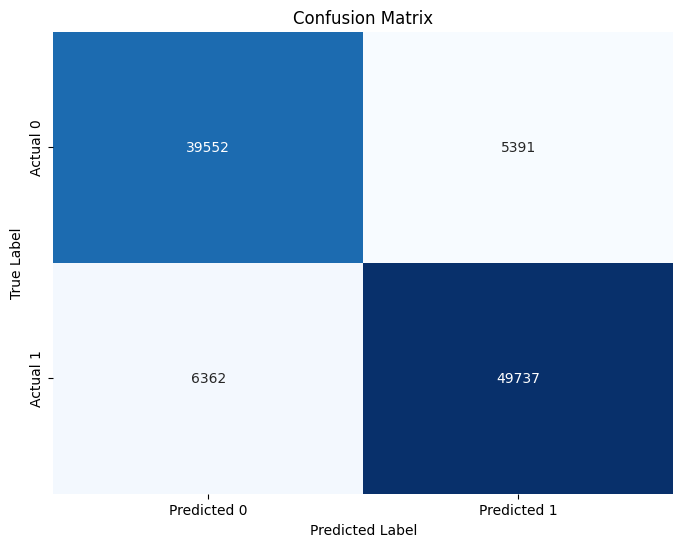

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Logistic Regression model
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
# Define the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform k-fold cross-validation and store accuracy scores for each fold
accuracy_scores = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    dtc_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = dtc_model.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    accuracy_scores.append(accuracy)
    print(f"Fold accuracy: {accuracy}")


# Calculate and print the average accuracy across all folds
avg_accuracy = np.mean(accuracy_scores)
print(f"Average accuracy across {n_splits} folds: {avg_accuracy}")

# Train on the entire training set
dtc_model.fit(X_train,y_train)
y_pred = dtc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Fold accuracy: 0.9357440649239791
Fold accuracy: 0.9369193275023815
Fold accuracy: 0.9374760308289931
Fold accuracy: 0.936152314030161
Fold accuracy: 0.936646377672209
Average accuracy across 5 folds: 0.9365876229915446
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92     44943
         1.0       0.90      1.00      0.95     56099

    accuracy                           0.94    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.94      0.93    101042



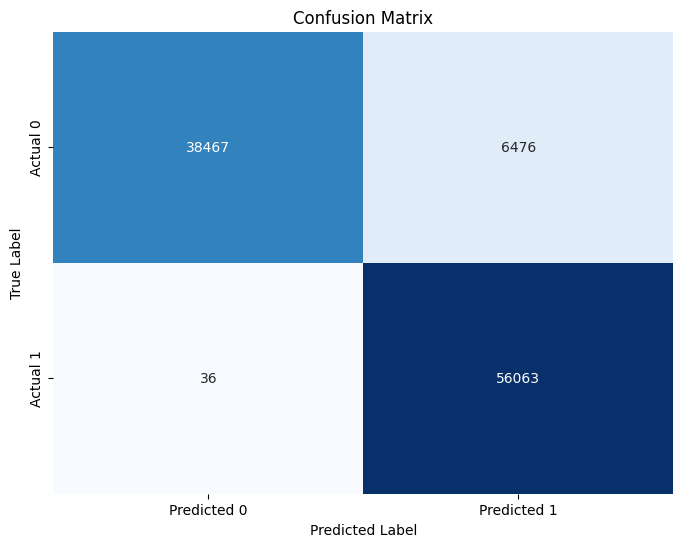

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
rfc_model = RandomForestClassifier()

# Define the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform k-fold cross-validation and store accuracy scores for each fold
accuracy_scores = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    rfc_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = rfc_model.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    accuracy_scores.append(accuracy)
    print(f"Fold accuracy: {accuracy}")


# Calculate and print the average accuracy across all folds
avg_accuracy = np.mean(accuracy_scores)
print(f"Average accuracy across {n_splits} folds: {avg_accuracy}")

# Train on the entire training set
rfc_model.fit(X_train,y_train)
y_pred = rfc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Fold accuracy: 0.9214182326525058
Fold accuracy: 0.9228656613016961
Fold accuracy: 0.9217151410933654
Fold accuracy: 0.9202924548142467
Fold accuracy: 0.9216028305621536
Average accuracy across 5 folds: 0.9215788640847935
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91     44943
         1.0       0.90      0.97      0.93     56099

    accuracy                           0.92    101042
   macro avg       0.93      0.91      0.92    101042
weighted avg       0.92      0.92      0.92    101042



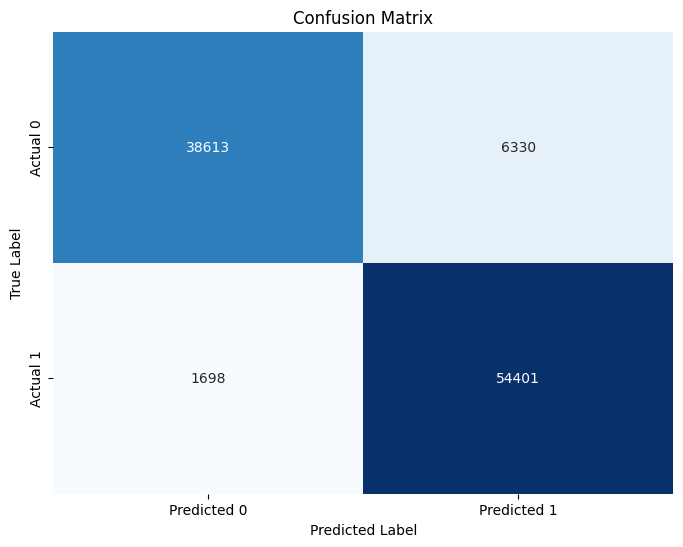

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize GradientBoostingClassifier
gbc_model = GradientBoostingClassifier()

# Define the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform k-fold cross-validation and store accuracy scores for each fold
accuracy_scores = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    gbc_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = gbc_model.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    accuracy_scores.append(accuracy)
    print(f"Fold accuracy: {accuracy}")


# Calculate and print the average accuracy across all folds
avg_accuracy = np.mean(accuracy_scores)
print(f"Average accuracy across {n_splits} folds: {avg_accuracy}")

# Train on the entire training set
gbc_model.fit(X_train,y_train)
y_pred = gbc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Text(0, 0.5, 'Feature')

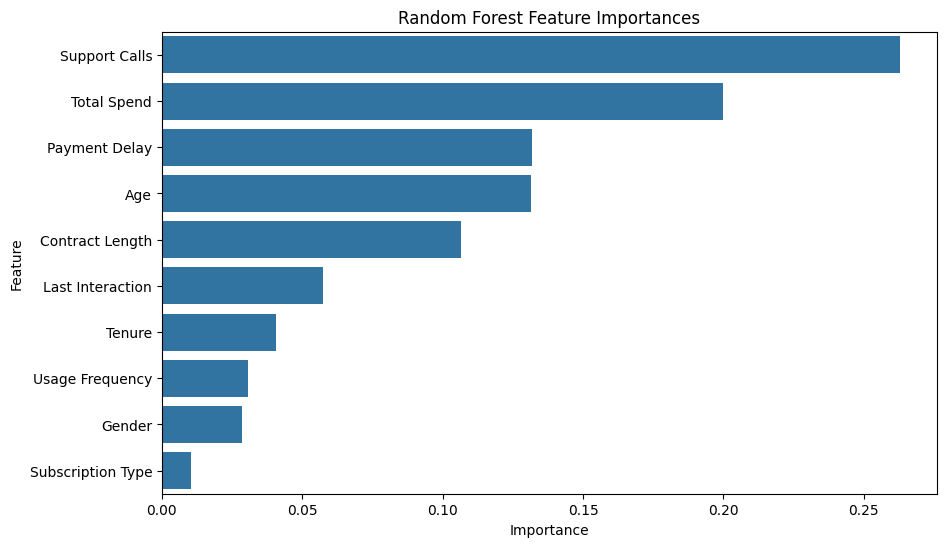

In [ ]:
# Access feature importances from the RandomForestClassifier model
feature_importances = rfc_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt()

# Models Comparison: Decision Tree, Random Forest, and Gradient Boosting

When evaluating the performance of different tree-based models—**Decision Tree Classifier (DTC)**, **Random Forest Classifier (RFC)**, and **Gradient Boosting Classifier (GBC)**—the results can vary significantly depending on the dataset's characteristics and the specific requirements of the task. Below is a comparison of the three models based on performance in scenarios with a large number of samples and features.

---

## 1. **Decision Tree Classifier (DTC)**
### **Advantages:**
- Simple and interpretable.
- Quick to train, making it suitable for exploratory analysis or small datasets.

### **Limitations in this case:**
- **Scalability issues:** With a large number of samples and features, a single decision tree often fails to capture the complexity of the data.
- **Overfitting risk:** Tends to overfit on the training data unless regularization techniques like `max_depth` or `min_samples_split` are carefully applied.
- **Lower accuracy:** Struggles to achieve high performance compared to ensemble methods like RFC or GBC due to the lack of ensemble effects.

---

## 2. **Random Forest Classifier (RFC)**
### **Advantages:**
- **Excellent scalability:** Combines the results of multiple decision trees (bagging) to improve overall performance.
- **Robust to noise:** Handles large datasets with many features effectively, reducing overfitting by averaging predictions.
- **Easy to use:** Performs well out-of-the-box without extensive parameter tuning.
- **Parallelizable:** Training can be distributed across multiple processors, making it faster on large datasets.

### **Performance:**
- Random Forest consistently provides **better accuracy** and generalization compared to DTC.
- Suitable for datasets with both many samples and features, performing well without requiring extensive tuning.

---

## 3. **Gradient Boosting Classifier (GBC)**
### **Advantages:**
- **High predictive power:** Builds trees sequentially, with each tree correcting errors of the previous ones.
- **Great for complex relationships:** Captures non-linear relationships and interactions between features more effectively than RFC.

### **Limitations in this case:**
- **Time-consuming:** Training is slower compared to RFC, especially with large datasets, as trees are built sequentially.
- **Sensitive to hyperparameters:** Requires careful tuning of parameters such as `learning_rate`, `n_estimators`, and `max_depth` to achieve optimal performance.
- **Prone to overfitting:** Without proper regularization, GBC may overfit to noisy data or small datasets.

---

## **Summary of Findings**
| Model        | Strengths                              | Limitations                                   | Best Use Case                                      |
|--------------|---------------------------------------|----------------------------------------------|---------------------------------------------------|
| **DTC**      | Simple, interpretable, fast training  | Overfits easily, low scalability             | Quick prototyping or small datasets.             |
| **RFC**      | High accuracy, robust, easy to use    | May require more memory on large datasets    | Datasets with many samples and features.         |
| **GBC**      | High predictive power, captures complexity | Slow training, sensitive to hyperparameters | Tasks requiring high accuracy with fine-tuning.  |

---

## **Recommendation**
- For datasets with **many samples and features**, **Random Forest Classifier (RFC)** is the most practical choice due to its balance of performance, robustness, and ease of use.
- Use **Gradient Boosting Classifier (GBC)** when higher accuracy is critical and you are willing to invest time in hyperparameter tuning.
- Opt for **Decision Tree Classifier (DTC)** in scenarios where interpretability and speed are more important than predictive power.

# Analysis Summary: Key Drivers of Churn

In the analysis of customer churn, it was observed that the features **`Support Calls`** and **`Total Spend`** have the most significant impact on customer churn. Below is a detailed summary of their influence and implications for business strategy.

---

## 1. **Feature: Support Calls**
### **Observations:**
- A strong positive correlation was found between the number of support calls and customer churn.
- Customers with **high support call frequencies** are significantly more likely to churn.
- This suggests that **unresolved issues or dissatisfaction with customer service** play a critical role in driving churn.

### **Business Implications:**
- **Enhance support quality:** Improve the responsiveness and effectiveness of customer support to address issues on the first call.
- **Monitor frequent callers:** Identify customers with an unusually high number of support calls and proactively reach out to resolve their concerns.
- **Automated escalation:** Implement systems to escalate unresolved issues promptly to higher levels of support.

---

## 2. **Feature: Total Spend**
### **Observations:**
- There is a noticeable pattern where customers with **higher total spend** tend to churn more often.
- High-spending customers may have **higher expectations** for service quality and product performance, making them more sensitive to dissatisfaction.

### **Business Implications:**
- **Reward high-value customers:** Introduce loyalty programs or special perks to retain customers with higher spending.
- **Segment-based support:** Provide personalized services or dedicated account managers for high-spending customers.
- **Analyze spend trends:** Examine whether high spenders are overpaying for services they do not fully utilize, which may contribute to dissatisfaction.

---

## **Key Insights:**
- **Combined impact:** Customers with both high support call frequencies and high total spend represent a **critical risk group** for churn.
- **Actionable strategies:**
  - Focus retention efforts on high-risk groups by combining data on support calls and total spend.
  - Use predictive models to identify and intervene with customers likely to churn based on these two features.

---

## **Next Steps**
1. **Data-Driven Interventions:**
   - Implement a churn prediction model using `Support Calls` and `Total Spend` as key predictors.
   - Create dashboards to monitor these features in real-time and trigger proactive retention measures.
   
2. **Customer Experience Improvements:**
   - Survey customers frequently to gather insights on their satisfaction with support and perceived value for money.
   - Use customer feedback to refine products and services, targeting common pain points.

3. **Measure Impact:**
   - Track churn rates over time to evaluate the effectiveness of intervention strategies.
   - Regularly review the relationship between these features and churn as customer behavior evolves.

---

By focusing on **Support Calls** and **Total Spend**, businesses can take targeted actions to reduce churn and improve overall customer satisfaction and loyalty.